# Ex. 1:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Creation of main Dataframes (delayed_flights, carriers and airports):

delayed_flights_raw = pd.read_csv('DelayedFlights.csv')
carriers_raw = pd.read_csv('carriers.csv')
airports_raw = pd.read_csv('airports.csv')


# Ex. 2: Exploratory analysis and statistical description:

### Delayed Flights

In [3]:
delayed_flights_raw.shape

(1936758, 30)

In [4]:
delayed_flights_raw.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
# Dataframe with main columns:

delayed_flights_reduced =  delayed_flights_raw[['FlightNum', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest', 'Cancelled', 'ArrDelay', 'DepDelay', 'ArrTime', 'CRSDepTime', 'DepTime', 'AirTime', 'Distance']]
delayed_flights_reduced.head()

,FlightNum,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Cancelled,ArrDelay,DepDelay,ArrTime,CRSDepTime,DepTime,AirTime,Distance
0,335,2008,1,3,4,WN,IAD,TPA,0,-14.0,8.0,2211.0,1955,2003.0,116.0,810
1,3231,2008,1,3,4,WN,IAD,TPA,0,2.0,19.0,1002.0,735,754.0,113.0,810
2,448,2008,1,3,4,WN,IND,BWI,0,14.0,8.0,804.0,620,628.0,76.0,515
3,3920,2008,1,3,4,WN,IND,BWI,0,34.0,34.0,1959.0,1755,1829.0,77.0,515
4,378,2008,1,3,4,WN,IND,JAX,0,11.0,25.0,2121.0,1915,1940.0,87.0,688


In [6]:
# Description:
# - 7 numerical variables: ArrDelay, DepDelay, ArrTime, CRSDepTime, DepTime, AirTme, Distance
# - 9 categorical values: date variables, UniqueCarrier, Origin, Dest, Cancelled (dummy)


delayed_flights_reduced.describe().round(1)

,FlightNum,Year,Month,DayofMonth,DayOfWeek,Cancelled,ArrDelay,DepDelay,ArrTime,CRSDepTime,DepTime,AirTime,Distance
count,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1928371.0,1936758.0,1929648.0,1936758.0,1936758.0,1928371.0,1936758.0
mean,2184.3,2008.0,6.1,15.8,4.0,0.0,42.2,43.2,1610.1,1467.5,1518.5,108.3,765.7
std,1944.7,0.0,3.5,8.8,2.0,0.0,56.8,53.4,548.2,424.8,450.5,68.6,574.5
min,1.0,2008.0,1.0,1.0,1.0,0.0,-109.0,6.0,1.0,0.0,1.0,0.0,11.0
25%,610.0,2008.0,3.0,8.0,2.0,0.0,9.0,12.0,1316.0,1135.0,1203.0,58.0,338.0
50%,1543.0,2008.0,6.0,16.0,4.0,0.0,24.0,24.0,1715.0,1510.0,1545.0,90.0,606.0
75%,3422.0,2008.0,9.0,23.0,6.0,0.0,56.0,53.0,2030.0,1815.0,1900.0,137.0,998.0
max,9742.0,2008.0,12.0,31.0,7.0,1.0,2461.0,2467.0,2400.0,2359.0,2400.0,1091.0,4962.0


In [7]:
# ArrDelay, ArrTime & AirTime have 0.4% missing values

(delayed_flights_reduced.isnull().sum()/len(delayed_flights_reduced)).round(3)

FlightNum        0.000
Year             0.000
Month            0.000
DayofMonth       0.000
DayOfWeek        0.000
UniqueCarrier    0.000
Origin           0.000
Dest             0.000
Cancelled        0.000
ArrDelay         0.004
DepDelay         0.000
ArrTime          0.004
CRSDepTime       0.000
DepTime          0.000
AirTime          0.004
Distance         0.000
dtype: float64

### Carriers

In [8]:
carriers_raw.shape

(1491, 2)

In [9]:
carriers_raw.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [10]:
carriers_raw.columns

Index(['Code', 'Description'], dtype='object')

In [11]:
carriers_raw.Description.unique()

array(['Titan Airways', 'Tradewind Aviation', 'Comlux Aviation, AG', ...,
       'Airbc Ltd.', 'Atlantic Gulf Airlines', 'Skyway Aviation Inc.'],
      dtype=object)

In [12]:
carriers_raw.Description.nunique()

1491

In [13]:
# Missing values

(carriers_raw.isnull().sum()/len(carriers_raw)).round(3)

Code           0.001
Description    0.000
dtype: float64

### Airports

In [14]:
airports_raw.shape

(3376, 7)

In [15]:
airports_raw.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [16]:
# 7 categorical variables

airports_raw.columns

Index(['iata', 'airport', 'city', 'state', 'country', 'lat', 'long'], dtype='object')

In [17]:
airports_raw.airport.nunique()

3245

In [18]:
airports_raw.city.nunique()

2675

In [19]:
airports_raw.state.nunique()

56

In [20]:
# Missing values

(airports_raw.isnull().sum()/len(airports_raw)).round(3)

iata       0.000
airport    0.000
city       0.004
state      0.004
country    0.000
lat        0.000
long       0.000
dtype: float64

## Data transformation

### Addition of new columns

In [21]:
# Avg Speed --> Distance/AirTime*60 km/hr

delayed_flights_reduced['AvgSpeed'] = delayed_flights_reduced['Distance']/delayed_flights_reduced['AirTime']*60

# Double delay --> Delay on departure & delay on arrival.

delayed_flights_reduced['DoubleDelay'] = np.where((delayed_flights_reduced['ArrDelay']>0) & (delayed_flights_reduced['DepDelay']>0), "yes", "no")

# Delayed (solo al llegar)

delayed_flights_reduced['Delayed'] = np.where(delayed_flights_reduced['ArrDelay']>0, "yes", "no")


# Nueva columna 'Date' en base a columnas Year, Month y DayofMonth:

delayed_flights_reduced.rename(columns={'DayofMonth':'Day'}, inplace=True)

delayed_flights_reduced['Date'] = pd.to_datetime(delayed_flights_reduced[['Year', 'Month', 'Day']])

delayed_flights_reduced

C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,FlightNum,Year,Month,Day,DayOfWeek,UniqueCarrier,Origin,Dest,Cancelled,ArrDelay,DepDelay,ArrTime,CRSDepTime,DepTime,AirTime,Distance,AvgSpeed,DoubleDelay,Delayed,Date
0,335,2008,1,3,4,WN,IAD,TPA,0,-14.0,8.0,2211.0,1955,2003.0,116.0,810,418.965517,no,no,2008-01-03
1,3231,2008,1,3,4,WN,IAD,TPA,0,2.0,19.0,1002.0,735,754.0,113.0,810,430.088496,yes,yes,2008-01-03
2,448,2008,1,3,4,WN,IND,BWI,0,14.0,8.0,804.0,620,628.0,76.0,515,406.578947,yes,yes,2008-01-03
3,3920,2008,1,3,4,WN,IND,BWI,0,34.0,34.0,1959.0,1755,1829.0,77.0,515,401.298701,yes,yes,2008-01-03
4,378,2008,1,3,4,WN,IND,JAX,0,11.0,25.0,2121.0,1915,1940.0,87.0,688,474.482759,yes,yes,2008-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,1621,2008,12,13,6,DL,MSP,ATL,0,25.0,30.0,1617.0,1220,1250.0,120.0,906,453.000000,yes,yes,2008-12-13
1936754,1631,2008,12,13,6,DL,RIC,ATL,0,75.0,57.0,904.0,600,657.0,78.0,481,370.000000,yes,yes,2008-12-13
1936755,1631,2008,12,13,6,DL,ATL,IAH,0,99.0,80.0,1149.0,847,1007.0,122.0,689,338.852459,yes,yes,2008-12-13
1936756,1639,2008,12,13,6,DL,IAD,ATL,0,9.0,11.0,1446.0,1240,1251.0,89.0,533,359.325843,yes,yes,2008-12-13


### Mapping from Carriers and Airports DF's to delayed_flights DF:

In [22]:
# Full Carrier Name mapping:

delayed_flights_reduced['FullCarrier'] = delayed_flights_reduced['UniqueCarrier'].map(carriers_raw.set_index('Code')['Description'])


# Full Airports mapping
delayed_flights_reduced['FullOrigin'] = delayed_flights_reduced['Origin'].map(airports_raw.set_index('iata')['airport'])
delayed_flights_reduced['FullDest'] = delayed_flights_reduced['Dest'].map(airports_raw.set_index('iata')['airport'])

delayed_flights_reduced

C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,FlightNum,Year,Month,Day,DayOfWeek,UniqueCarrier,Origin,Dest,Cancelled,ArrDelay,...,DepTime,AirTime,Distance,AvgSpeed,DoubleDelay,Delayed,Date,FullCarrier,FullOrigin,FullDest
0,335,2008,1,3,4,WN,IAD,TPA,0,-14.0,...,2003.0,116.0,810,418.965517,no,no,2008-01-03,Southwest Airlines Co.,Washington Dulles International,Tampa International
1,3231,2008,1,3,4,WN,IAD,TPA,0,2.0,...,754.0,113.0,810,430.088496,yes,yes,2008-01-03,Southwest Airlines Co.,Washington Dulles International,Tampa International
2,448,2008,1,3,4,WN,IND,BWI,0,14.0,...,628.0,76.0,515,406.578947,yes,yes,2008-01-03,Southwest Airlines Co.,Indianapolis International,Baltimore-Washington International
3,3920,2008,1,3,4,WN,IND,BWI,0,34.0,...,1829.0,77.0,515,401.298701,yes,yes,2008-01-03,Southwest Airlines Co.,Indianapolis International,Baltimore-Washington International
4,378,2008,1,3,4,WN,IND,JAX,0,11.0,...,1940.0,87.0,688,474.482759,yes,yes,2008-01-03,Southwest Airlines Co.,Indianapolis International,Jacksonville International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,1621,2008,12,13,6,DL,MSP,ATL,0,25.0,...,1250.0,120.0,906,453.000000,yes,yes,2008-12-13,Delta Air Lines Inc.,Minneapolis-St Paul Intl,William B Hartsfield-Atlanta Intl
1936754,1631,2008,12,13,6,DL,RIC,ATL,0,75.0,...,657.0,78.0,481,370.000000,yes,yes,2008-12-13,Delta Air Lines Inc.,Richmond International,William B Hartsfield-Atlanta Intl
1936755,1631,2008,12,13,6,DL,ATL,IAH,0,99.0,...,1007.0,122.0,689,338.852459,yes,yes,2008-12-13,Delta Air Lines Inc.,William B Hartsfield-Atlanta Intl,George Bush Intercontinental
1936756,1639,2008,12,13,6,DL,IAD,ATL,0,9.0,...,1251.0,89.0,533,359.325843,yes,yes,2008-12-13,Delta Air Lines Inc.,Washington Dulles International,William B Hartsfield-Atlanta Intl


### Delayed flights database cleaning

In [30]:
# Creación de nuevo DF en base al anteriormente trabajado y reordenamiento de columnas (eliminación de columnas excedentes de Fecha)

delayed_flights = delayed_flights_reduced[['Date', 'DayOfWeek', 'FlightNum', 'FullCarrier', 'Origin', 'FullOrigin', 'Dest', 'FullDest', 'Cancelled', 'Delayed', 'DoubleDelay', 'ArrDelay', 'DepDelay', 'ArrTime', 'CRSDepTime', 'DepTime', 'AirTime', 'Distance', 'AvgSpeed']]

# FlightNumber as Index

delayed_flights = delayed_flights.set_index('Date').sort_values(by='Date', ascending=True)


# AvSpeed rounded to 2 decimals

delayed_flights['AvgSpeed'] = delayed_flights['AvgSpeed'].round(2)

### Conversión de columnas a formar HH:MM

In [31]:
delayed_flights['ArrTime'] = delayed_flights['ArrTime'].fillna(delayed_flights['ArrTime'].mean())
delayed_flights['ArrTime'] = delayed_flights['ArrTime'].astype(int)
delayed_flights['ArrTime'] = delayed_flights['ArrTime'].astype(str).apply(lambda x: x.zfill(4))
delayed_flights['ArrTime'] = delayed_flights['ArrTime'].str[:2] + ':' + delayed_flights['ArrTime'].str[-2:]

In [32]:
delayed_flights['DepTime'] = delayed_flights['DepTime'].astype(int)
delayed_flights['DepTime'] = delayed_flights['DepTime'].fillna(delayed_flights['DepTime'].mean())
delayed_flights['DepTime'] = delayed_flights['DepTime'].astype(str).apply(lambda x: x.zfill(4))
delayed_flights['DepTime'] = delayed_flights['DepTime'].str[:2] + ':' + delayed_flights['DepTime'].str[-2:]

In [33]:
delayed_flights['CRSDepTime'] = delayed_flights['CRSDepTime'].fillna(delayed_flights['CRSDepTime'].mean())
delayed_flights['CRSDepTime'] = delayed_flights['CRSDepTime'].astype(str).apply(lambda x: x.zfill(4))
delayed_flights['CRSDepTime'] = delayed_flights['CRSDepTime'].str[:2] + ':' + delayed_flights['CRSDepTime'].str[-2:]

In [35]:
delayed_flights

,DayOfWeek,FlightNum,FullCarrier,Origin,FullOrigin,Dest,FullDest,Cancelled,Delayed,DoubleDelay,ArrDelay,DepDelay,ArrTime,CRSDepTime,DepTime,AirTime,Distance,AvgSpeed
Date,,,,,,,,,,,,,,,,,,
2008-01-01,2,1239,United Air Lines Inc.,PDX,Portland Intl,LAX,Los Angeles International,0,yes,yes,16.0,13.0,21:11,18:39,18:52,116.0,834,431.38
2008-01-01,2,1659,Continental Air Lines Inc.,IAH,George Bush Intercontinental,DFW,Dallas-Fort Worth International,0,yes,yes,2.0,6.0,19:02,17:50,17:56,43.0,224,312.56
2008-01-01,2,5621,Comair Inc.,ATL,William B Hartsfield-Atlanta Intl,BTR,"Baton Rouge Metropolitan, Ryan",0,yes,yes,42.0,52.0,10:57,09:28,10:20,78.0,449,345.38
2008-01-01,2,5630,Comair Inc.,CVG,Cincinnati Northern Kentucky Intl,CID,Eastern Iowa,0,yes,yes,27.0,15.0,15:12,14:15,14:30,73.0,419,344.38
2008-01-01,2,597,American Airlines Inc.,ORD,Chicago O'Hare International,SAT,San Antonio International,0,yes,yes,43.0,72.0,22:43,19:00,20:12,130.0,1041,480.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-31,3,553,JetBlue Airways,EWR,Newark Intl,RSW,Southwest Florida International,0,yes,yes,100.0,98.0,12:57,08:05,09:43,165.0,1068,388.36
2008-12-31,3,529,JetBlue Airways,EWR,Newark Intl,MCO,Orlando International,0,yes,yes,7.0,22.0,23:34,20:40,21:02,133.0,938,423.16
2008-12-31,3,527,JetBlue Airways,EWR,Newark Intl,MCO,Orlando International,0,yes,yes,6.0,7.0,21:53,18:55,19:02,132.0,938,426.36


### New Table: Flights% (amount of flights / total flights) and Cancelled% (amount of cancelled / total cancelled)

In [36]:
# Creation of Carrier DF with Flights/TotalFlights column (without cancelled flights)

amount_of_flights = len(delayed_flights[delayed_flights['Cancelled'] == 0])
carrier_data = delayed_flights[delayed_flights['Cancelled'] == 0].groupby('FullCarrier')[['FlightNum']].apply(lambda x: x.count()/amount_of_flights*100).round(2)


# Addition of ArrDelay/ArrDelayTotal column

ArrDelaySum = delayed_flights[delayed_flights['Cancelled'] == 0]['ArrDelay'].sum()
ArrDelay_ArrDelayTotal = delayed_flights[delayed_flights['Cancelled'] == 0].groupby('FullCarrier')[['ArrDelay']].apply(lambda x: x.sum()/ArrDelaySum*100).round(2)
carrier_data['ArrDelay_ArrDelayTotal%'] = ArrDelay_ArrDelayTotal['ArrDelay']

# Addition of Canceled/CancelledTotal column

CancelledCount = len(delayed_flights[delayed_flights['Cancelled'] == 1])
Cancelled_CancelledTotal = delayed_flights[delayed_flights['Cancelled'] == 1].groupby('FullCarrier')[['Cancelled']].apply(lambda x: x.count()/CancelledCount*100).round(2)
carrier_data['Cancelled_CancelledTotal%'] = Cancelled_CancelledTotal['Cancelled']

# Rename columns
carrier_data.rename(columns= {'FlightNum': 'Flights_FlightsTotal%'}, inplace=True)
carrier_data.sort_values(by='Cancelled_CancelledTotal%', ascending=False).head()

,Flights_FlightsTotal%,ArrDelay_ArrDelayTotal%,Cancelled_CancelledTotal%
FullCarrier,,,
American Eagle Airlines Inc.,7.32,7.86,16.43
Skywest Airlines Inc.,6.84,7.35,14.06
Pinnacle Airlines Inc.,2.68,2.97,9.16
Mesa Airlines Inc.,3.46,4.54,8.37
United Air Lines Inc.,7.30,8.27,7.42


### New Table: Destination Data

In [37]:
# Creation of Destination DF with Flights/TotalFlights column (without cancelled flights)

#amount_of_flights = len(delayed_flights['FlightNum'])
destination_data = delayed_flights[delayed_flights['Cancelled'] == 0].groupby('Dest')[['FlightNum']].apply(lambda x: x.count()/amount_of_flights*100).round(2)


# Addition of ArrDelay/ArrDelayTotal column

ArrDelay_ArrDelayTotal_dest = delayed_flights[delayed_flights['Cancelled'] == 0].groupby('Dest')[['ArrDelay']].apply(lambda x: x.sum()/ArrDelaySum*100).round(2)
destination_data['ArrDelay/ArrDelayTotal%'] = ArrDelay_ArrDelayTotal_dest['ArrDelay']

# Addition of Canceled/CancelledTotal column

#CancelledCount = len(delayed_flights[delayed_flights['Cancelled'] == 1])
Cancelled_CancelledTotal_dest = delayed_flights[delayed_flights['Cancelled'] == 1].groupby('Dest')[['Cancelled']].apply(lambda x: x.count()/CancelledCount*100).round(2)
destination_data['Cancelled/CancelledTotal%'] = Cancelled_CancelledTotal_dest['Cancelled']

# Rename columns
destination_data.rename(columns= {'FlightNum': 'Flights/FlightsTotal%'}, inplace=True)

destination_data.sort_values(by='Cancelled/CancelledTotal%', ascending=False).head()



,Flights/FlightsTotal%,ArrDelay/ArrDelayTotal%,Cancelled/CancelledTotal%
Dest,,,
ORD,5.63,7.99,11.53
ATL,5.52,6.27,4.11
EWR,2.88,4.08,3.32
SEA,1.63,1.38,2.53
ASE,0.08,0.07,2.37


### New Table: WeekDay Data

In [38]:
# Creation of DayOfWeek DF with Flights/TotalFlights column (without cancelled flights)

#amount_of_flights = len(delayed_flights['FlightNum'])
DayOfWeek_data = delayed_flights[delayed_flights['Cancelled'] == 0].groupby('DayOfWeek')[['FlightNum']].apply(lambda x: x.count()/amount_of_flights*100).round(2)


# Addition of ArrDelay/ArrDelayTotal column

ArrDelay_ArrDelayTotal_dayofweek = delayed_flights[delayed_flights['Cancelled'] == 0].groupby('DayOfWeek')[['ArrDelay']].apply(lambda x: x.sum()/ArrDelaySum*100).round(2)
DayOfWeek_data['ArrDelay/ArrDelayTotal%'] = ArrDelay_ArrDelayTotal_dayofweek['ArrDelay']

# Addition of Canceled/CancelledTotal column

#CancelledCount = len(delayed_flights[delayed_flights['Cancelled'] == 1])
Cancelled_CancelledTotal_dayofweek = delayed_flights[delayed_flights['Cancelled'] == 1].groupby('DayOfWeek')[['Cancelled']].apply(lambda x: x.count()/CancelledCount*100)
DayOfWeek_data['Cancelled/CancelledTotal%'] = Cancelled_CancelledTotal_dayofweek['Cancelled'].round(2)

# Rename columns
DayOfWeek_data.rename(columns= {'FlightNum': 'Flights/FlightsTotal%'}, inplace=True)
DayOfWeek_data.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

DayOfWeek_data

,Flights/FlightsTotal%,ArrDelay/ArrDelayTotal%,Cancelled/CancelledTotal%
Monday,15.02,14.86,10.58
Tuesday,13.47,13.97,18.96
Wednesday,13.57,12.99,16.43
Thursday,14.95,14.55,10.90
Friday,16.69,17.21,16.11
Saturday,11.53,10.76,12.32
Sunday,14.77,15.65,14.69


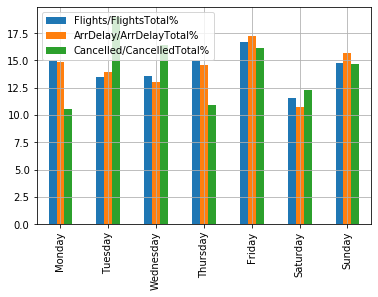

In [39]:
DayOfWeek_data.plot(kind='bar', grid='On')

## Queries:

### Top 10 carriers with higher amount of delayed flights

In [40]:

# Amount of unique carriers:
print('La cantidad de carriers es: ', len(pd.unique(delayed_flights['FullCarrier'])))


# Top 10 carriers con mayor cantidad de vuelos demorados (todos los vuelos están demorados, así que es suficiente con contar la cantidad de vuelos)

full_carrier = delayed_flights.groupby('FullCarrier').count()[['FlightNum']].sort_values(by='FlightNum', ascending=False)
full_carrier.head(10)

La cantidad de carriers es:  20


,FlightNum
FullCarrier,
Southwest Airlines Co.,377602
American Airlines Inc.,191865
American Eagle Airlines Inc.,141920
United Air Lines Inc.,141426
Skywest Airlines Inc.,132433
Delta Air Lines Inc.,114238
Expressjet Airlines Inc.,103663
Continental Air Lines Inc.,100195
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.),98425


### Percentage of delayed flights vs own flights

### Percentage % of cancelled flights over total flights by Carrier:

In [41]:
amount_cancelled = delayed_flights['Cancelled'].sum()
pct_cancelled_table = delayed_flights[delayed_flights['Cancelled'] == 1].groupby('FullCarrier')[['Cancelled']].apply(lambda x: x.sum()/amount_cancelled)

pct_cancelled_table

,Cancelled
FullCarrier,
AirTran Airways Corporation,0.011058
Alaska Airlines Inc.,0.017378
American Airlines Inc.,0.072670
American Eagle Airlines Inc.,0.164297
Atlantic Southeast Airlines,0.045814
Comair Inc.,0.018957
Continental Air Lines Inc.,0.060032
Delta Air Lines Inc.,0.033175
Expressjet Airlines Inc.,0.072670


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D02F7F97C8>],
      dtype=object)

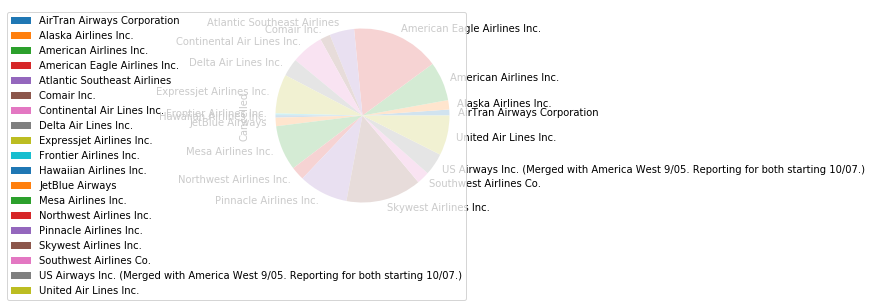

In [52]:
delayed_flights[delayed_flights['Cancelled'] == 1].groupby('FullCarrier')[['Cancelled']].apply(lambda x: x.sum()/amount_cancelled).plot(kind='pie', subplots=True)

In [43]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
my_circle

### Table: Flights% (amount of flights / total flights) and Cancelled% (amount of cancelled / total cancelled)

### Longest Flight by Carrier

In [44]:
#Vuelo más largo de cada aerolínea

longest_flight = delayed_flights.groupby('FullCarrier').apply(lambda reduced_data: reduced_data.loc[reduced_data.Distance.idxmax()]).sort_values(by='Distance', ascending=False)
longest_flight

DayOfWeek  FlightNum  \
FullCarrier                Date                               
Continental Air Lines Inc. 2008-01-04          5         15   
Delta Air Lines Inc.       2008-01-01          2       1282   
                           2008-01-01          2       1273   
American Airlines Inc.     2008-01-01          2         73   
United Air Lines Inc.      2008-01-01          2          1   
...                                          ...        ...   
Northwest Airlines Inc.    2008-01-02          3        284   
                           2008-01-02          3        481   
                           2008-01-02          3       1626   
Skywest Airlines Inc.      2008-03-21          5       5458   
Alaska Airlines Inc.       2008-01-01          2         64   

                                                      FullCarrier Origin  \
FullCarrier                Date                                            
Continental Air Lines Inc. 2008-01-04  Continental Air Lines Inc.    EWR   
Delta Air Lines Inc.       2008-01-01        Delta Air Lines Inc.    HNL   
                           2008-01-01        Delta Air Lines Inc.    ATL   
American Airlines Inc.     2008-01-01      American Airlines Inc.    ORD   
United Air Lines Inc.      2008-01-01       United Air Lines Inc.    ORD   
...                                                           ...    ...   
Northwest Airlines Inc.    2008-01-02     Northwest Airlines Inc.    DTW   
                           2008-01-02     Northwest Airlines Inc.    DTW   
                           2008-01-02     Northwest Airlines Inc.    DTW   
Skywest Airlines Inc.      2008-03-21       Skywest Airlines Inc.    LAX   
Alaska Airlines Inc.       2008-01-01        Alaska Airlines Inc.    PSG   

                                                              FullOrigin Dest  \
FullCarrier                Date                                                 
Continental Air Lines Inc. 2008-01-04                        Newark Intl  HNL   
Delta Air Lines Inc.       2008-01-01             Honolulu International  ATL   
                           2008-01-01  William B Hartsfield-Atlanta Intl  HNL   
American Airlines Inc.     2008-01-01       Chicago O'Hare International  HNL   
United Air Lines Inc.      2008-01-01       Chicago O'Hare International  HNL   
...                                                                  ...  ...   
Northwest Airlines Inc.    2008-01-02  Detroit Metropolitan-Wayne County  FNT   
                           2008-01-02  Detroit Metropolitan-Wayne County  FNT   
                           2008-01-02  Detroit Metropolitan-Wayne County  FNT   
Skywest Airlines Inc.      2008-03-21          Los Angeles International  OXR   
Alaska Airlines Inc.       2008-01-01        James C. Johnson Petersburg  WRG   

                                                                FullDest  \
FullCarrier                Date                                            
Continental Air Lines Inc. 2008-01-04             Honolulu International   
Delta Air Lines Inc.       2008-01-01  William B Hartsfield-Atlanta Intl   
                           2008-01-01             Honolulu International   
American Airlines Inc.     2008-01-01             Honolulu International   
United Air Lines Inc.      2008-01-01             Honolulu International   
...                                                                  ...   
Northwest Airlines Inc.    2008-01-02                             Bishop   
                           2008-01-02                             Bishop   
                           2008-01-02                             Bishop   
Skywest Airlines Inc.      2008-03-21                             Oxnard   
Alaska Airlines Inc.       2008-01-01                           Wrangell   

                                       Cancelled Delayed DoubleDelay  \
FullCarrier                Date                                        
Continental Air Lines Inc. 2008-01-04      

### Top 10 delayed Flights:

In [45]:
#Top vuelos más atrasados (Hs respecto a duración estimada) amount_delayed = ArrTime - CRSArrTime


delayed_flights.sort_values(by='ArrDelay', ascending=False).head(10)


,DayOfWeek,FlightNum,FullCarrier,Origin,FullOrigin,Dest,FullDest,Cancelled,Delayed,DoubleDelay,ArrDelay,DepDelay,ArrTime,CRSDepTime,DepTime,AirTime,Distance,AvgSpeed
Date,,,,,,,,,,,,,,,,,,
2008-02-03,7,808,Northwest Airlines Inc.,HNL,Honolulu International,MSP,Minneapolis-St Paul Intl,0,yes,yes,2461.0,2457.0,22:56,18:20,11:17,437.0,3972,545.35
2008-04-10,4,1699,Northwest Airlines Inc.,CLT,Charlotte/Douglas International,MSP,Minneapolis-St Paul Intl,0,yes,yes,2453.0,2467.0,08:58,14:17,07:24,132.0,930,422.73
2008-05-06,2,1107,Northwest Airlines Inc.,RSW,Southwest Florida International,DTW,Detroit Metropolitan-Wayne County,0,yes,yes,1951.0,1952.0,02:54,15:30,00:02,145.0,1085,448.97
2008-06-20,5,3538,American Eagle Airlines Inc.,LIT,Adams,DFW,Dallas-Fort Worth International,0,yes,yes,1707.0,1710.0,22:52,17:10,21:40,50.0,304,364.80
2008-12-19,5,357,Northwest Airlines Inc.,BOS,Gen Edw L Logan Intl,MSP,Minneapolis-St Paul Intl,0,yes,yes,1655.0,1597.0,19:21,13:25,16:02,192.0,1124,351.25
2008-09-01,1,512,Northwest Airlines Inc.,OMA,Eppley Airfield,MSP,Minneapolis-St Paul Intl,0,yes,yes,1583.0,1552.0,10:48,07:14,09:06,75.0,282,225.60
2008-04-27,7,1472,Northwest Airlines Inc.,MOT,Minot International,MSP,Minneapolis-St Paul Intl,0,yes,yes,1542.0,1545.0,19:42,16:33,18:18,63.0,449,427.62
2008-01-05,6,2398,American Airlines Inc.,EGE,Eagle County Regional,MIA,Miami International,0,yes,yes,1525.0,1275.0,14:52,10:45,08:00,207.0,1811,524.93
2008-07-16,3,804,Northwest Airlines Inc.,SEA,Seattle-Tacoma Intl,MSP,Minneapolis-St Paul Intl,0,yes,yes,1510.0,1518.0,13:25,07:02,08:20,160.0,1399,524.62


# Additional visualizations

### Variable numérica

[0, 300, 0, 1500000]

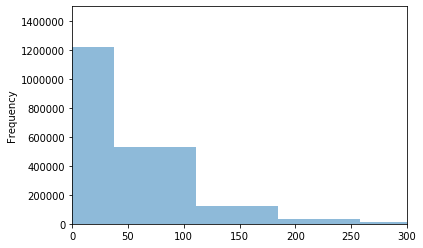

In [70]:
# Histograma

delayed_flights['ArrDelay'].plot(kind='hist', alpha=0.5, bins=35)
plt.axis([0, 300, 0, 1500000])

[-300, 300, 0, 0.0175]

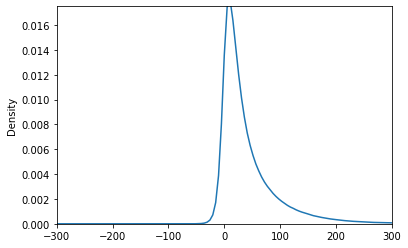

In [105]:
delayed_flights['ArrDelay'].plot.density()
plt.axis([-300, 300, 0, 0.0175])

### Una variable categórica

,FullCarrier,Cancelled%
0,AirTran Airways Corporation,0.000098
1,Alaska Airlines Inc.,0.000280
2,Aloha Airlines Inc.,0.000000
3,American Airlines Inc.,0.000240
4,American Eagle Airlines Inc.,0.000733
5,Atlantic Southeast Airlines,0.000354
6,Comair Inc.,0.000228
7,Continental Air Lines Inc.,0.000379
8,Delta Air Lines Inc.,0.000184
9,Expressjet Airlines Inc.,0.000444


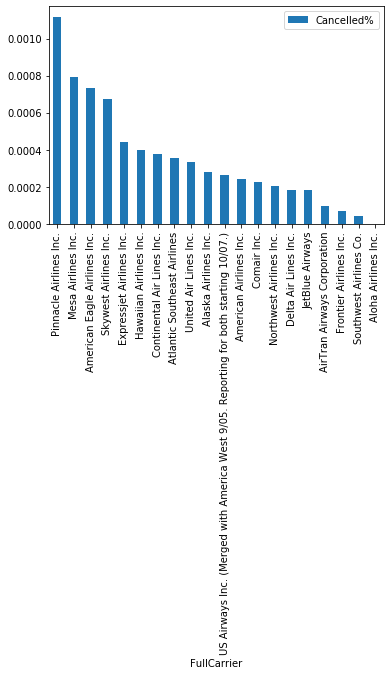

In [46]:
# Amount of Cancelled Flights over Total Flights:

cancelled_percentage = (delayed_flights['Cancelled'] == 1).groupby(delayed_flights['FullCarrier']).apply(lambda x: x.sum() / len(x)).reset_index(name='Cancelled%')
cancelled_percentage.set_index('FullCarrier').sort_values(by='Cancelled%', ascending=False).plot(kind='bar')
cancelled_percentage

### Dos variables numéricas: ArrDelay vs DepDelay

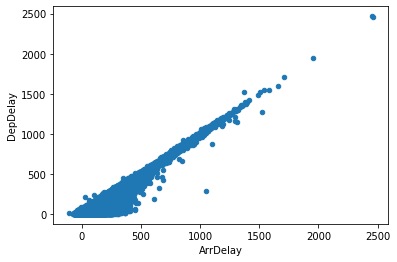

In [47]:
delayed_flights.plot(x='ArrDelay', y='DepDelay', kind='scatter')

Existe una clara correlación entre el ArrDelay y el DepDelay. Cuando un vuelo presencia demoras en la salida, muy posiblemente también presente demoras en su llegada, y viceversa.

### Variable categórica + variable numérica

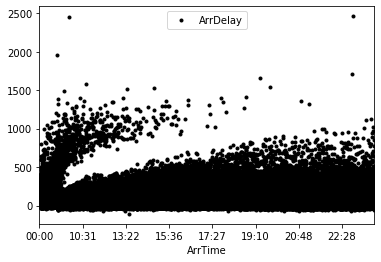

In [39]:
# Variable categórica y dos cariables numéricas:

sorted_values = delayed_flights.sort_values(by='ArrTime')

sorted_values.plot(x='ArrTime', y='ArrDelay', style='k.')
plt.show()

### Tres variables numéricas + variable categórica

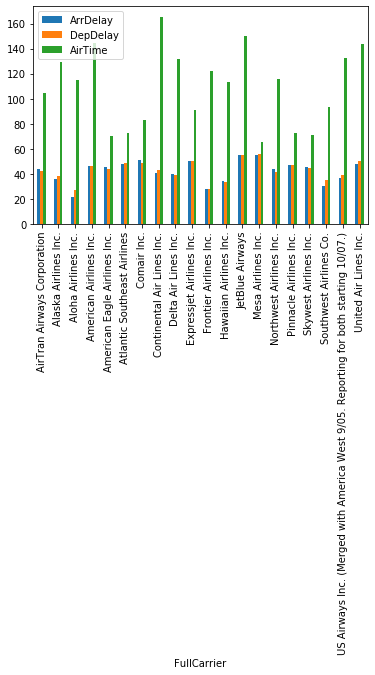

In [51]:
# Variables numéricas + variable categórica (arrdelay + depdelay + airtime + fullcarrier):

delayed_flights.groupby('FullCarrier')[['ArrDelay', 'DepDelay', 'AirTime']].mean().plot(kind='bar')

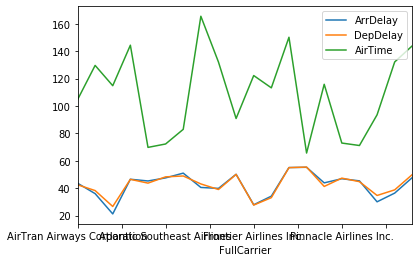

In [52]:
delayed_flights.groupby('FullCarrier')[['ArrDelay', 'DepDelay', 'AirTime']].mean().plot()

### Gráfico de correlación entre variables numéricas

C:\Users\tomi_\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\tomi_\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


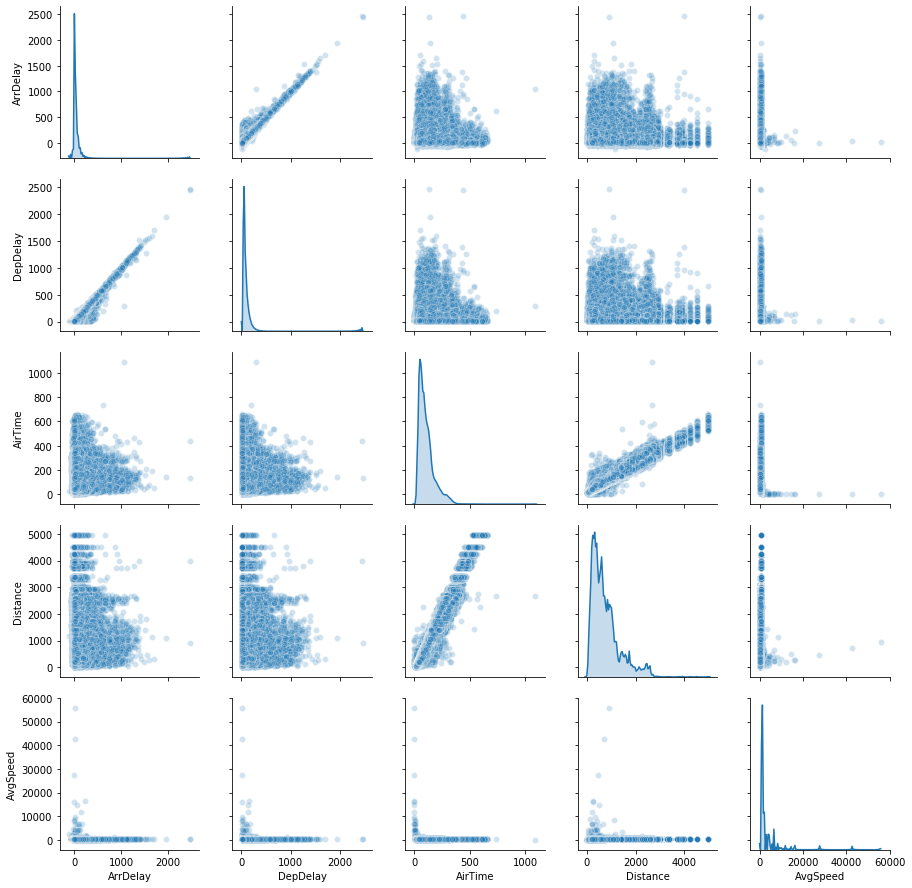

In [48]:
import seaborn as sns

numerical_data = delayed_flights[['ArrDelay', 'DepDelay', 'AirTime', 'Distance', 'AvgSpeed', 'CRSDepTime']]

sns.pairplot(numerical_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### ArrDelay vs CRSDepTime

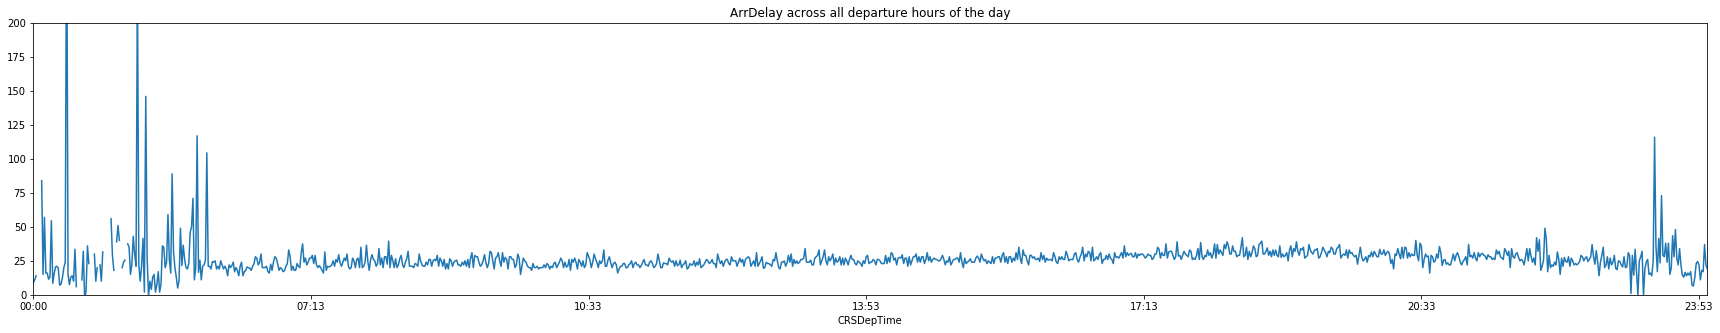

In [49]:
fig = plt.figure(figsize=(30,5))
ax = fig.gca()
delayed_flights.groupby('CRSDepTime')['ArrDelay'].median().plot(title='ArrDelay across all departure hours of the day', ax=ax)
ax.set_ylim(0,200)
plt.show()